# Data Preprocessing 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## Importing the dataset

In [7]:
df1 = pd.read_csv('real_estate_data.csv')

In [8]:
df2 = pd.read_csv('projects_data.csv')

### MERGE DATAFRAME

In [10]:
# Join hai DataFrame lại với nhau
merged_df = pd.merge(df1, df2, on='project_oid', how='inner')

In [11]:
# Hiển thị kết quả
merged_df.head()

,ad_id,list_id,list_time,date,account_id,projectid,project_oid,account_oid,account_name,state,...,street_name,area_v2,web_url,facilities_key,surrounding_key,investor_id,investor_name,paid_time,short_introduction_content,full_url_with_params
0,149173109,109212357,1.712927e+12,3 ngày trước,4735114,2464,1582239957,b144d70d0cf27d2fb85f9acec319e1ad,MR TOÀN,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
1,156266188,115304264,1.712549e+12,1 tuần trước,19890442,2464,1582239957,2ca66c644efc61538b5b8c566a7b3601,Phước Bình Land,accepted,...,Đường Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
2,156220843,115265512,1.712246e+12,2 tuần trước,9809355,2464,1582239957,9e980419635ca710ce81ced52d1fd372,DIEM,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
3,155978499,115057158,1.711619e+12,3 tuần trước,25481412,2464,1582239957,ed86d1bdfae46ca66407c9ea8588d034,Nguyễn Khắc Thành,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
4,155935060,115019801,1.711522e+12,3 tuần trước,3737279,2464,1582239957,569a0038167cba4a32f856190c415c76,Khanh,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...


### THU GIẢM DỮ LIỆU

In [13]:
# Loại bỏ cột không sử dụng
columns_to_drop = ['ad_id', 'list_id','list_time','date','account_id','account_oid','account_name','state','region_v2','type','price_string','escrow_can_deposit','params','paid_time','paid_time','short_introduction_content','full_url_with_params']  # Thay thế bằng tên các cột bạn muốn loại bỏ
merged_df = merged_df.drop(columns=columns_to_drop)

In [14]:
print(merged_df)

       projectid  project_oid  \
0           2464   1582239957   
1           2464   1582239957   
2           2464   1582239957   
3           2464   1582239957   
4           2464   1582239957   
...          ...          ...   
10794       3931   1833333982   
10795       4397   1312047912   
10796       4818    453709511   
10797       4266   1964432767   
10798       4460   1786510809   

                                                 subject  \
0      chủ vỡ nợ ban gấp nhà DTA 100m2 1 trệt 1 lầu t...   
1                                  Hàng ngộp cần bán gấp   
2                                           kẹt tiền trả   
3      Chính Chủ Cần Bán Gấp Căn Nhà Dự Án DTA giá bá...   
4      Chính chủ bán lỗ căn chung 33m2 xã Phước An gầ...   
...                                                  ...   
10794             chính chủ cần bán lô Tân Long 1 sổ sẵn   
10795       BÁN 2 LÔ LIỀN KỀ A29 A30 OSAKA 2 VÕ VĂN BÍCH   
10796  Chính chủ bán căn hộ An Hội. Tặng nội thất cao...   
107

### Xử lý dữ liệu trùng lặp

In [15]:
# Đếm số lượng dữ liệu trùng lặp
duplicate_count = merged_df.duplicated().sum()

In [16]:
print(f"Số lượng dữ liệu trùng lặp trước khi xử lý: {duplicate_count}")

Số lượng dữ liệu trùng lặp trước khi xử lý: 38


In [17]:
# Xử lý dữ liệu trùng lặp
merged_df.drop_duplicates(inplace=True)

In [18]:
# Đếm số lượng dữ liệu trùng lặp sau khi xử lý
duplicate_count = merged_df.duplicated().sum()

In [20]:
print(f"Số lượng dữ liệu lặp sau xử lý: {duplicate_count}")

Số lượng dữ liệu lặp sau xử lý: 0


### Thay thế dữ liệu thiếu
Các tập dữ liệu thường chứa các giá trị thiếu, điều này có thể gây ra vấn đề cho các thuật toán học máy. Thay thế dữ liệu thiếu được gọi là bù đắp dữ liệu (data imputation).

In [25]:
for i in range(len(merged_df.columns)):
    missing_data = merged_df[merged_df.columns[i]].isna().sum()
    perc = missing_data / len(merged_df) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 0, percentage 0.00
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 0, percentage 0.00
>5,  missing entries: 0, percentage 0.00
>6,  missing entries: 0, percentage 0.00
>7,  missing entries: 0, percentage 0.00
>8,  missing entries: 0, percentage 0.00
>9,  missing entries: 0, percentage 0.00
>10,  missing entries: 0, percentage 0.00
>11,  missing entries: 2, percentage 0.02
>12,  missing entries: 1030, percentage 9.57
>13,  missing entries: 0, percentage 0.00
>14,  missing entries: 2, percentage 0.02
>15,  missing entries: 2, percentage 0.02
>16,  missing entries: 2, percentage 0.02
>17,  missing entries: 3, percentage 0.03
>18,  missing entries: 3, percentage 0.03
>19,  missing entries: 3, percentage 0.03
>20,  missing entries: 0, percentage 0.00
>21,  missing entries: 4, percentage 0.04
>22,  missing entries: 0, percentage 0.00
>23,  missing entries: 0, percentage 0.00

In [26]:
# Đếm số lượng giá trị thiếu trong mỗi cột
missing_values_count = merged_df.isnull().sum()

print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values_count)

Số lượng giá trị thiếu trong mỗi cột:
projectid                  0
project_oid                0
subject                    0
body                       0
category                   0
category_name              0
area                       0
area_name                  0
region                     0
region_name                0
company_ad                 0
price                      2
rooms                   1030
size                       0
ward                       2
ward_name                  2
price_million_per_m2       2
location                   3
longitude                  3
latitude                   3
zero_deposit               0
street_name                4
area_v2                    0
web_url                    0
facilities_key             0
surrounding_key            0
investor_id                0
investor_name            250
dtype: int64


<Axes: >

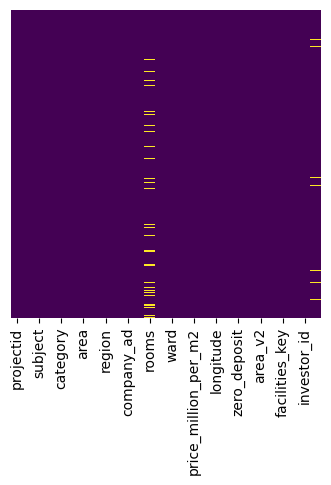

In [27]:
plt.figure(figsize = (4,4)) #hiển thị các giá trị thiếu trong tập dữ liệu
sns.heatmap(merged_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [31]:
# Điền giá trị trung bình cho các cột dữ liệu thiếu
merged_df['price'].fillna(merged_df['price'].mean(), inplace=True)
merged_df['rooms'].fillna(merged_df['rooms'].mean(), inplace=True)
merged_df['ward'].fillna(merged_df['ward'].mean(), inplace=True)
merged_df['longitude'].fillna(merged_df['longitude'].mean(), inplace=True)
merged_df['latitude'].fillna(merged_df['latitude'].mean(), inplace=True)
merged_df['price_million_per_m2'].fillna(merged_df['price_million_per_m2'].mean(), inplace=True)

In [33]:
# Kiểm tra lại DataFrame sau khi điền giá trị thiếu
print(merged_df.isnull().sum())

projectid                 0
project_oid               0
subject                   0
body                      0
category                  0
category_name             0
area                      0
area_name                 0
region                    0
region_name               0
company_ad                0
price                     0
rooms                     0
size                      0
ward                      0
ward_name                 2
price_million_per_m2      0
location                  3
longitude                 0
latitude                  0
zero_deposit              0
street_name               4
area_v2                   0
web_url                   0
facilities_key            0
surrounding_key           0
investor_id               0
investor_name           250
dtype: int64


In [36]:
# Danh sách các cột bạn muốn kiểm tra null
columns_to_check_null = ['ward_name', 'street_name', 'investor_name','location']  # Thay thế bằng tên của các cột bạn muốn kiểm tra null

# Loại bỏ dòng có giá trị null trong các cột đã chỉ định
merged_df = merged_df.dropna(subset=columns_to_check_null)


In [37]:
# Kiểm tra lại DataFrame sau khi điền giá trị thiếu
print(merged_df.isnull().sum())

projectid               0
project_oid             0
subject                 0
body                    0
category                0
category_name           0
area                    0
area_name               0
region                  0
region_name             0
company_ad              0
price                   0
rooms                   0
size                    0
ward                    0
ward_name               0
price_million_per_m2    0
location                0
longitude               0
latitude                0
zero_deposit            0
street_name             0
area_v2                 0
web_url                 0
facilities_key          0
surrounding_key         0
investor_id             0
investor_name           0
dtype: int64


In [38]:
print(merged_df)

       projectid  project_oid  \
0           2464   1582239957   
1           2464   1582239957   
2           2464   1582239957   
3           2464   1582239957   
4           2464   1582239957   
...          ...          ...   
10794       3931   1833333982   
10795       4397   1312047912   
10796       4818    453709511   
10797       4266   1964432767   
10798       4460   1786510809   

                                                 subject  \
0      chủ vỡ nợ ban gấp nhà DTA 100m2 1 trệt 1 lầu t...   
1                                  Hàng ngộp cần bán gấp   
2                                           kẹt tiền trả   
3      Chính Chủ Cần Bán Gấp Căn Nhà Dự Án DTA giá bá...   
4      Chính chủ bán lỗ căn chung 33m2 xã Phước An gầ...   
...                                                  ...   
10794             chính chủ cần bán lô Tân Long 1 sổ sẵn   
10795       BÁN 2 LÔ LIỀN KỀ A29 A30 OSAKA 2 VÕ VĂN BÍCH   
10796  Chính chủ bán căn hộ An Hội. Tặng nội thất cao...   
107

### Xử lý giá trị nhiễu

In [39]:
# Định nghĩa hàm để đếm outlier sử dụng IQR
def count_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.shape[0]

In [40]:
# Tạo DataFrame mới để lưu số lượng outlier của mỗi cột
outliers_count = pd.DataFrame(columns=['Column', 'Outliers'])

In [42]:
# Đếm số lượng outlier của mỗi cột và thêm vào DataFrame mới
for column in merged_df.columns:
    outliers_count.loc[len(outliers_count)] = [column, count_outliers_iqr(merged_df[column])]

# Hiển thị kết quả
print(outliers_count)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [16]:
# Lọc giá trị nhiễu cho từng cột
threshold = 3  # Độ lệch chuẩn tối đa cho phép
removed_values = 0

for column in merged_df.columns:
    mean = merged_df[column].mean()
    std = merged_df[column].std()
    outliers = (merged_df[column] - mean) / std > threshold
    removed_values += outliers.sum()
    merged_df = merged_df[~outliers]

TypeError: Could not convert string '3 ngày trước1 tuần trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước2 tháng trướchôm qua3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước2 tháng trước4 ngày trước3 giờ trước3 giờ trước22 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước4 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước2 tháng trước23 phút trước4 giờ trước5 giờ trước6 giờ trước16 giờ trước16 giờ trước20 giờ trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước19 giờ trước22 giờ trướchôm quahôm qua3 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước1 tháng trước3 ngày trước3 tuần trước5 ngày trước3 tuần trước6 giờ trước6 giờ trước20 giờ trước20 giờ trướchôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước1 tháng trước2 tháng trước1 giờ trước3 giờ trước18 giờ trước23 giờ trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước1 tháng trước18 giờ trướchôm qua2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước6 ngày trướchôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước4 tuần trước4 ngày trước1 tuần trướchôm qua3 ngày trước3 ngày trước2 tuần trước2 tuần trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước3 ngày trước1 tuần trước2 tuần trước2 tuần trước3 ngày trước1 tháng trước3 giờ trướchôm quahôm qua2 tuần trướchôm qua5 ngày trước2 tuần trước5 giờ trước17 giờ trước17 giờ trước21 giờ trướchôm qua3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước2 tuần trước3 tuần trước1 tuần trước1 tuần trước2 tháng trước3 ngày trước5 ngày trước5 ngày trước2 tuần trước1 tuần trước35 phút trước1 giờ trước23 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước4 tuần trước1 tháng trước2 tháng trướchôm qua3 ngày trước3 ngày trước3 ngày trước4 ngày trước7 ngày trước1 tuần trước2 tuần trước3 tuần trước3 giờ trước3 giờ trước3 giờ trước17 giờ trước21 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước22 giờ trướchôm qua3 ngày trước3 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước2 tháng trước3 giờ trước4 giờ trướchôm qua3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước4 tuần trước4 tuần trước3 giờ trước17 giờ trướchôm quahôm qua2 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước1 giờ trước2 giờ trước4 giờ trướchôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 giờ trước2 giờ trước2 giờ trước2 giờ trước2 giờ trước17 giờ trướchôm quahôm quahôm qua2 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước12 phút trước41 phút trước2 giờ trước4 giờ trước4 giờ trước5 giờ trước6 giờ trước18 giờ trước22 giờ trước22 giờ trước23 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước23 giờ trước3 ngày trước1 tuần trước2 tuần trước2 tuần trước4 tuần trước2 ngày trước2 giờ trước1 tuần trước1 tháng trước2 tuần trước2 tháng trước60 phút trước4 giờ trước1 tuần trước1 tuần trước2 tuần trước5 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tuần trước15 giờ trước15 giờ trước15 giờ trước17 giờ trước21 giờ trước22 giờ trước23 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trướchôm qua5 ngày trước6 ngày trước2 tuần trước2 tuần trước1 giờ trước2 giờ trước3 giờ trước3 giờ trước15 giờ trước15 giờ trước16 giờ trước16 giờ trướchôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trướchôm qua3 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 giờ trước2 giờ trước2 giờ trước2 giờ trước3 giờ trước3 giờ trước3 giờ trước4 giờ trước4 giờ trước4 giờ trước15 giờ trước21 giờ trước22 giờ trước22 giờ trước22 giờ trước23 giờ trước23 giờ trước23 giờ trước24 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước4 tuần trước1 tháng trước20 giờ trước20 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 ngày trước3 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tháng trước2 tuần trước3 tuần trước1 tháng trước5 ngày trước3 tuần trước1 tháng trước3 ngày trước2 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước26 phút trước48 phút trước21 giờ trước22 giờ trước22 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước4 tuần trước1 tháng trước7 ngày trước1 giờ trước23 giờ trước3 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước3 ngày trước4 ngày trước4 ngày trước1 tuần trước2 tuần trước2 tuần trước4 tuần trước4 giờ trước4 giờ trước19 giờ trước22 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước22 phút trước28 phút trước1 giờ trước2 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước4 giờ trước4 giờ trước5 giờ trước6 giờ trước19 giờ trước19 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 giờ trước2 giờ trước23 giờ trướchôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm qua6 ngày trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước2 giờ trước16 giờ trước3 ngày trước4 ngày trước6 phút trước1 giờ trước2 giờ trước3 giờ trước4 giờ trước4 giờ trước17 giờ trước21 giờ trước23 giờ trước24 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước16 giờ trước21 giờ trước4 ngày trước2 tuần trước3 tuần trước2 tuần trước5 ngày trước2 giờ trước3 giờ trước5 giờ trước5 giờ trước13 giờ trước13 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước1 tuần trước2 tháng trướchôm qua2 ngày trước5 ngày trước2 tuần trước1 tháng trước1 tháng trước6 ngày trước7 ngày trước2 tuần trước2 tuần trước3 ngày trước1 tháng trước22 giờ trước4 ngày trước2 tuần trước2 giờ trước3 giờ trước4 giờ trước15 giờ trước20 giờ trước21 giờ trước21 giờ trước24 giờ trước24 giờ trướchôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước39 phút trước1 giờ trước1 giờ trước2 giờ trước2 giờ trước2 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước4 giờ trước15 giờ trước15 giờ trước18 giờ trước19 giờ trước19 giờ trước19 giờ trước20 giờ trước20 giờ trước20 giờ trước20 giờ trước21 giờ trước22 giờ trước22 giờ trước22 giờ trước24 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước2 ngày trước3 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 ngày trước2 ngày trước4 ngày trước5 ngày trước6 ngày trước1 tháng trướchôm qua4 ngày trước6 ngày trước1 tuần trước1 tuần trước4 tuần trước4 ngày trước4 ngày trước1 tuần trước1 tuần trước3 tuần trước22 giờ trước1 tuần trước1 tuần trước4 tuần trước6 ngày trước7 ngày trước2 tháng trước1 tuần trước2 tháng trước2 tháng trước3 ngày trước3 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tuần trước3 ngày trước1 tháng trước2 tháng trước2 tháng trước1 tháng trước1 tháng trước2 tuần trước2 tháng trước2 tuần trước3 ngày trước2 giờ trước2 giờ trước4 giờ trước20 giờ trước20 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước2 tháng trước2 giờ trước2 giờ trước19 giờ trướchôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước22 giờ trướchôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước16 giờ trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước3 tuần trước2 tháng trước5 ngày trước4 ngày trước22 giờ trướchôm qua2 tháng trước16 giờ trướchôm qua2 tuần trước5 ngày trước3 tuần trước1 giờ trước1 giờ trước1 giờ trước2 giờ trước4 giờ trước4 giờ trước4 giờ trước15 giờ trước15 giờ trước16 giờ trước17 giờ trước20 giờ trước22 giờ trước22 giờ trước22 giờ trước22 giờ trước22 giờ trước22 giờ trước22 giờ trước22 giờ trước23 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước55 phút trước21 giờ trước22 giờ trước22 giờ trướchôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 giờ trướchôm qua2 ngày trước3 ngày trước3 ngày trước6 ngày trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước2 giờ trước13 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trướchôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước4 ngày trước6 ngày trước6 ngày trước1 tuần trước2 tuần trước2 giờ trước2 ngày trước3 ngày trước5 ngày trước2 tuần trước3 tuần trước4 tuần trước2 giờ trước4 ngày trước7 ngày trước4 ngày trước6 ngày trước1 tuần trước3 tuần trước1 tháng trước2 tháng trước14 giờ trước4 ngày trước3 tuần trước2 tuần trước19 giờ trước2 tuần trước21 giờ trướchôm qua3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước6 ngày trước2 ngày trước3 ngày trước1 tuần trước16 giờ trước3 ngày trước5 ngày trước1 tuần trước1 tuần trước3 tuần trước2 tháng trước4 tuần trước1 tuần trước3 giờ trước3 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm qua1 tuần trước2 giờ trước21 giờ trướchôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước4 giờ trước4 giờ trước4 giờ trước5 giờ trước15 giờ trước19 giờ trước22 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước1 tháng trước2 tháng trước45 phút trước58 phút trước1 giờ trước3 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trướchôm quahôm qua4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 ngày trước6 ngày trước7 ngày trước7 ngày trước2 giờ trước2 giờ trước20 giờ trướchôm qua5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước2 tháng trước31 phút trước31 phút trước3 ngày trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước1 tuần trước3 tuần trước3 tuần trước3 tuần trước4 ngày trước6 ngày trước1 tuần trước3 ngày trước7 ngày trước3 giờ trước2 tuần trước2 tháng trước6 ngày trước7 ngày trước4 giờ trước13 giờ trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước2 giờ trướchôm qua3 ngày trước3 ngày trước3 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước3 tuần trước3 tuần trước2 tháng trước2 tháng trước1 tuần trước5 ngày trước2 tuần trước6 giờ trước6 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 năm trước14 giờ trước2 ngày trướchôm quahôm quahôm qua3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước23 giờ trước2 tuần trước2 tuần trước4 tuần trước22 giờ trước22 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 ngày trước5 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tuần trước17 giờ trướchôm qua3 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tháng trước2 tuần trước1 tháng trước1 tuần trước1 tuần trước2 tuần trước5 ngày trước5 ngày trước2 tháng trướchôm qua1 tuần trướchôm qua1 tuần trước2 tuần trước1 tuần trước1 tháng trước4 ngày trước3 tuần trước4 tuần trướchôm qua1 tuần trước2 tuần trước2 tuần trước1 tháng trước3 ngày trước2 tuần trước1 tuần trước1 tháng trước2 tuần trước2 tháng trước2 tuần trước3 tuần trước2 ngày trước3 ngày trước6 ngày trước1 tháng trước2 ngày trước20 giờ trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước4 ngày trước6 ngày trước2 tuần trước2 giờ trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước4 tuần trước1 tháng trước2 tháng trước2 tháng trước2 tháng trướchôm quahôm qua2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước4 tuần trước19 giờ trước22 giờ trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước3 giờ trước5 giờ trướchôm qua3 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tháng trước4 ngày trước5 ngày trước6 ngày trước2 tháng trước2 tháng trước2 tháng trước1 tuần trước20 giờ trướchôm quahôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm qua3 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tháng trước2 ngày trướchôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước5 giờ trướchôm qua3 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước2 tuần trước1 tháng trước2 tháng trước5 giờ trước2 tuần trước16 giờ trước17 giờ trước20 giờ trước20 giờ trước20 giờ trước21 giờ trước21 giờ trước22 giờ trước23 giờ trước23 giờ trước24 giờ trướchôm quahôm quahôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước2 tháng trước20 giờ trước20 giờ trước21 giờ trước22 giờ trước22 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 giờ trước4 giờ trước16 giờ trướchôm qua2 ngày trước3 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 giờ trước3 giờ trước3 giờ trước3 giờ trướchôm quahôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước2 tháng trước20 giờ trướchôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 ngày trước17 giờ trước14 giờ trước4 ngày trước5 ngày trước1 tuần trước3 ngày trước4 ngày trước2 tuần trước3 tuần trước4 ngày trước5 ngày trước2 tháng trước1 tháng trước2 tuần trước3 giờ trướchôm quahôm qua2 ngày trước6 ngày trước7 ngày trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước6 ngày trước1 tuần trước6 ngày trước6 ngày trước20 giờ trước5 ngày trướchôm qua3 tuần trước2 tuần trước26 phút trước1 giờ trước2 giờ trước2 giờ trước2 giờ trước3 giờ trước3 giờ trước3 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước5 giờ trước5 giờ trước22 giờ trước22 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước1 phút trước2 phút trước15 giờ trước16 giờ trước16 giờ trước17 giờ trước17 giờ trước19 giờ trước19 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước51 phút trước1 giờ trước1 giờ trước1 giờ trước2 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước4 giờ trước5 giờ trước5 giờ trước17 giờ trước18 giờ trước21 giờ trước21 giờ trước22 giờ trước24 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước7 giờ trước16 giờ trước19 giờ trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 giờ trước5 giờ trước21 giờ trướchôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước2 giờ trước2 giờ trước3 giờ trước17 giờ trướchôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước18 giờ trước24 giờ trước24 giờ trướchôm quahôm qua3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước1 tháng trước1 tháng trước2 tháng trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước2 tháng trướchôm qua3 ngày trước4 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước7 ngày trước1 tuần trước4 tuần trước4 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước2 tháng trước2 tháng trước18 giờ trướchôm qua3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước3 ngày trước6 ngày trước2 tuần trước2 tuần trước2 tháng trước3 ngày trước6 ngày trước2 tuần trước2 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước5 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước4 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước57 phút trước18 giờ trước4 ngày trước5 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước4 ngày trước1 tuần trước2 tuần trước5 ngày trước1 tuần trước2 tuần trước4 tuần trước1 tháng trước4 ngày trước3 tuần trước4 ngày trước5 ngày trước1 tuần trước3 tuần trước3 tuần trước1 giờ trước7 ngày trước1 tuần trước3 tuần trước5 ngày trước1 tháng trước6 ngày trước1 tuần trước20 giờ trướchôm qua5 ngày trước4 tuần trướchôm qua5 ngày trước6 ngày trước6 ngày trước1 tuần trước4 ngày trước8 giờ trước2 tháng trước2 tuần trước1 tuần trước1 tuần trước3 giờ trước5 giờ trước2 tuần trước2 tuần trước12 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước3 ngày trước1 tuần trước1 tuần trước19 giờ trước19 giờ trước19 giờ trước19 giờ trước19 giờ trước24 giờ trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước16 giờ trướchôm quahôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tháng trước2 tháng trước1 tuần trước2 tháng trước19 giờ trướchôm qua5 ngày trước1 tuần trước4 ngày trước2 tuần trước14 phút trước14 phút trước4 giờ trước23 giờ trước23 giờ trước23 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước2 tháng trước46 phút trước48 phút trước4 giờ trước4 giờ trước4 giờ trước5 giờ trước23 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 giờ trước2 giờ trước3 giờ trước3 giờ trước6 giờ trướchôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước2 tháng trướchôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước1 giờ trước3 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước1 tháng trước2 giờ trước2 ngày trước3 ngày trước3 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước4 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trướchôm qua2 ngày trước2 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước4 giờ trước2 ngày trước5 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước4 ngày trước5 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước3 tuần trước1 tháng trướchôm qua6 ngày trước4 tuần trước2 tháng trước3 tuần trước4 tuần trướchôm qua7 ngày trước2 tuần trước6 ngày trước1 tuần trước2 tuần trước3 tuần trướchôm qua2 tháng trước1 tuần trước2 tuần trước4 tuần trước1 tuần trước2 tuần trước2 tuần trước6 ngày trước1 tuần trước1 tháng trước6 ngày trước2 tuần trước4 ngày trước5 ngày trước1 tuần trước4 ngày trước7 ngày trước3 giờ trước1 tháng trước1 tuần trướchôm qua7 ngày trước1 tuần trước1 tuần trước2 tuần trước4 ngày trước5 ngày trước1 tuần trước2 tháng trước1 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước6 giờ trước19 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước19 giờ trướchôm qua4 ngày trước5 ngày trước7 ngày trước1 tuần trước2 tuần trước4 tuần trước1 tháng trước37 phút trước57 phút trước1 giờ trước2 giờ trước2 giờ trước2 giờ trước2 giờ trước2 giờ trước2 giờ trước2 giờ trước2 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước3 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước5 giờ trước5 giờ trước5 giờ trước19 giờ trước19 giờ trước20 giờ trước20 giờ trước20 giờ trước20 giờ trước20 giờ trước20 giờ trước20 giờ trước20 giờ trước21 giờ trước21 giờ trước21 giờ trước21 giờ trước21 giờ trước22 giờ trước22 giờ trước22 giờ trước23 giờ trước23 giờ trước24 giờ trước24 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước2 giờ trước2 giờ trước2 giờ trước4 giờ trước21 giờ trước22 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tháng trước12 phút trước43 phút trước2 giờ trướchôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước4 tuần trướchôm quahôm quahôm qua3 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước2 tháng trước2 tháng trước22 giờ trướchôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước5 ngày trước5 ngày trước6 ngày trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước4 giờ trướchôm qua1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước4 giờ trước3 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 ngày trước3 ngày trước3 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước4 tuần trước1 tháng trước3 ngày trước5 ngày trước1 tuần trước1 tháng trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước2 tuần trước2 giờ trước1 tháng trước4 ngày trước1 tháng trước3 giờ trước2 giờ trước16 giờ trướchôm quahôm quahôm qua3 ngày trước5 ngày trước1 tháng trước3 giờ trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước3 tuần trước3 ngày trước4 tuần trước3 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước4 tuần trước1 giờ trước3 giờ trước7 giờ trước17 giờ trướchôm qua3 ngày trước3 ngày trước3 ngày trước5 ngày trước5 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tháng trước1 tháng trước1 tháng trước5 ngày trước4 giờ trước4 giờ trước4 giờ trước20 giờ trước20 giờ trước21 giờ trước22 giờ trước22 giờ trước22 giờ trước22 giờ trước22 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 giờ trước4 giờ trước19 giờ trước20 giờ trước21 giờ trước22 giờ trước24 giờ trướchôm qua2 ngày trước2 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tháng trước2 tháng trước3 giờ trước18 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước4 ngày trước4 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước2 tháng trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước3 ngày trước4 ngày trước6 ngày trước6 ngày trước2 tuần trước2 tuần trước1 tháng trước2 tháng trướchôm quahôm qua1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trướchôm qua5 ngày trước5 ngày trước1 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước4 ngày trước4 ngày trước6 ngày trước1 tuần trước2 tuần trước4 tuần trước2 tháng trước4 giờ trước4 giờ trước5 giờ trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm qua3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước3 tuần trước3 tuần trước1 tháng trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 giờ trước15 giờ trước21 giờ trướchôm qua6 ngày trước1 tuần trước3 tuần trước4 ngày trước4 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước6 ngày trước7 ngày trước1 tuần trước1 tuần trướchôm qua1 tuần trước3 giờ trước3 tuần trước4 tuần trước2 tháng trước7 ngày trước1 tuần trước2 tháng trước5 ngày trước5 ngày trước2 tuần trước3 ngày trước5 ngày trước1 tuần trước2 giờ trước2 tuần trước4 ngày trước7 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tháng trước1 tuần trước2 tháng trước3 tuần trước3 tuần trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước5 ngày trước4 giờ trước3 ngày trước1 tháng trước6 giờ trước4 giờ trước13 giờ trước3 ngày trước1 tuần trước3 tuần trước3 tuần trước4 tuần trước4 ngày trước4 ngày trước6 ngày trước1 tháng trước3 ngày trước1 tháng trước11 giờ trước6 ngày trước2 ngày trước4 giờ trước21 giờ trước23 giờ trước23 giờ trước23 giờ trước24 giờ trướchôm qua3 ngày trước3 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước4 ngày trước3 tuần trước2 ngày trước3 ngày trước3 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước1 tháng trước2 tháng trước2 tuần trướchôm qua6 ngày trước1 tuần trước2 tuần trước1 tháng trước4 giờ trước24 giờ trướchôm quahôm qua2 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước4 tuần trước23 giờ trước23 giờ trướchôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 giờ trước3 giờ trước5 giờ trước5 giờ trước5 giờ trướchôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước1 giờ trước16 giờ trước17 giờ trước17 giờ trướchôm qua5 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước2 giờ trước6 giờ trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trướchôm qua3 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tháng trước4 giờ trướchôm qua3 ngày trước6 ngày trước4 tuần trước3 ngày trước4 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trướchôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước5 ngày trước6 ngày trước1 tháng trướchôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước2 ngày trước6 ngày trước2 tuần trước4 giờ trước18 giờ trướchôm qua3 ngày trước4 ngày trước7 ngày trước1 tuần trước1 tuần trước3 giờ trước3 ngày trước4 ngày trước4 ngày trước1 tuần trước2 tuần trước1 tháng trước1 tháng trước4 ngày trước6 ngày trước1 tuần trước2 tuần trước5 ngày trước1 tuần trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước2 giờ trước4 ngày trước5 ngày trước1 tháng trước1 tháng trước1 tháng trước6 ngày trước2 tuần trước5 ngày trước1 tuần trước2 tuần trước2 tuần trước4 tuần trước6 giờ trước1 tuần trước3 tuần trước3 giờ trước3 giờ trước3 giờ trước2 tuần trước4 giờ trướchôm qua2 tháng trước5 ngày trước2 tháng trước1 tháng trước22 giờ trước22 giờ trướchôm quahôm quahôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước2 tháng trước5 giờ trước2 tuần trước1 tháng trước4 giờ trước4 ngày trước4 ngày trước1 tuần trước1 tuần trước4 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước16 giờ trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước3 tuần trướchôm qua6 ngày trướchôm qua4 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước4 tuần trướchôm qua3 ngày trước5 ngày trước6 ngày trước7 ngày trước7 ngày trước19 giờ trước1 tuần trước2 tuần trước4 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tuần trước1 tháng trướchôm qua4 ngày trước4 ngày trước7 ngày trước1 tháng trước2 tuần trước3 tuần trước1 tuần trước3 ngày trước4 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước3 ngày trước4 ngày trước4 tuần trước2 tuần trước2 tuần trước2 tháng trước23 giờ trướchôm qua4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước3 ngày trước4 ngày trước6 ngày trước6 ngày trước2 tuần trước2 tuần trước2 tuần trước4 ngày trước1 tháng trước4 ngày trước3 giờ trước15 giờ trước2 ngày trước5 ngày trước1 tuần trước1 tháng trước2 tháng trước1 tuần trước5 ngày trước2 ngày trước5 ngày trước1 tháng trước1 giờ trước4 giờ trước15 giờ trước17 giờ trướchôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước5 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước4 tuần trướchôm qua3 ngày trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tuần trước4 giờ trước6 ngày trước2 tuần trước2 tuần trước4 ngày trước3 ngày trước3 tuần trước5 ngày trước1 tuần trướchôm quahôm qua3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước39 phút trước2 giờ trước3 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước5 giờ trước6 giờ trước6 giờ trước21 giờ trước21 giờ trước22 giờ trước22 giờ trước22 giờ trước23 giờ trước23 giờ trước23 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước42 phút trước55 phút trước15 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước2 tháng trước1 giờ trước4 giờ trước4 giờ trước4 giờ trước8 giờ trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước3 tuần trước3 giờ trướchôm quahôm qua2 ngày trước3 ngày trước5 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước2 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước2 tháng trước2 giờ trước3 giờ trướchôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước21 giờ trước22 giờ trướchôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 giờ trước17 giờ trước24 giờ trướchôm quahôm quahôm qua3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước15 giờ trước19 giờ trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước1 tháng trước1 tháng trước1 tháng trước54 năm trướchôm qua3 ngày trước3 ngày trước5 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước3 giờ trước3 giờ trước4 giờ trước21 giờ trước22 giờ trước23 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 giờ trước5 giờ trướchôm qua3 ngày trước4 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tháng trước5 giờ trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 ngày trước5 ngày trước5 ngày trước5 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước4 tuần trước2 tuần trước2 tháng trước2 tháng trước4 ngày trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tuần trước1 tháng trước1 tháng trước6 ngày trước2 tuần trước3 ngày trước2 tuần trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước5 ngày trước7 ngày trước1 tuần trước4 ngày trước1 tuần trướchôm qua5 ngày trước4 tuần trước1 tuần trước2 tháng trước3 giờ trước2 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước2 tháng trướchôm qua4 ngày trước1 tuần trước5 ngày trước5 ngày trước2 tháng trước2 tháng trước1 tháng trướchôm qua1 tuần trước1 tuần trước2 tháng trước20 giờ trước1 tháng trước4 ngày trước7 ngày trước2 tuần trước2 tuần trước4 tuần trước4 tuần trước16 giờ trước2 ngày trước4 ngày trước5 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước18 giờ trước3 ngày trước1 tuần trước1 tuần trước3 tuần trước6 ngày trước6 ngày trước1 giờ trước2 giờ trước3 giờ trước3 giờ trước3 giờ trước17 giờ trước21 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước23 giờ trướchôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước4 ngày trước5 ngày trước7 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 giờ trước4 giờ trước19 giờ trướchôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước2 ngày trước3 ngày trước5 ngày trước6 ngày trước1 tuần trước2 tuần trước5 ngày trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước2 tháng trước1 tháng trước3 giờ trước2 ngày trước5 ngày trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước1 tháng trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tháng trước3 ngày trước5 ngày trước3 giờ trước5 ngày trước1 tuần trước4 tuần trướchôm qua6 ngày trước1 tuần trước1 tuần trước2 tháng trước7 ngày trước2 tuần trước2 tuần trước24 giờ trước6 ngày trước1 tháng trước3 giờ trước2 ngày trước4 ngày trước4 ngày trước2 giờ trước6 ngày trước6 ngày trước7 ngày trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước3 ngày trước1 tuần trước3 tuần trước3 tuần trước4 tuần trước3 ngày trước3 tuần trước3 tuần trước3 tuần trước1 tháng trước1 tuần trước2 tuần trước3 ngày trước3 ngày trước5 ngày trước6 ngày trước1 tuần trước2 tuần trướchôm qua3 ngày trước7 ngày trước2 tuần trước22 giờ trước3 ngày trước2 giờ trước2 giờ trước4 giờ trước22 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tuần trước1 tuần trước1 tháng trước1 giờ trướchôm qua3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trướchôm quahôm qua1 tháng trước1 tháng trước2 giờ trước1 tuần trước5 ngày trước2 tuần trước4 tuần trướchôm quahôm quahôm qua2 ngày trước4 ngày trước1 tuần trước3 tuần trước2 tháng trước3 tuần trước4 ngày trước4 tuần trước1 tháng trước3 ngày trước5 ngày trước7 ngày trước1 tháng trướchôm qua7 ngày trước4 ngày trước1 tuần trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tháng trước2 ngày trướchôm qua3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm qua3 ngày trước1 tháng trướchôm qua2 tuần trướchôm qua3 ngày trước4 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tháng trước1 tháng trước1 tháng trước4 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước21 giờ trước4 ngày trước5 ngày trước1 tháng trước3 tuần trước3 giờ trước4 giờ trước5 giờ trước5 giờ trước17 giờ trướchôm quahôm qua3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước4 ngày trước6 ngày trước17 giờ trướchôm quahôm qua3 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước6 ngày trước1 tuần trước1 tuần trước1 tháng trướchôm qua3 ngày trước4 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước24 giờ trướchôm qua3 ngày trước4 ngày trước5 ngày trước6 ngày trước2 tuần trước2 tuần trước2 tháng trướchôm quahôm qua2 ngày trước2 ngày trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước1 tháng trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tháng trước2 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 giờ trước2 giờ trước4 giờ trước6 ngày trước1 tuần trước11 giờ trước2 tuần trước3 tuần trước4 tuần trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước3 tuần trước5 ngày trước1 tuần trước5 giờ trước5 ngày trước3 ngày trước5 ngày trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trướchôm qua5 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tuần trước6 ngày trước3 tuần trước6 ngày trước7 ngày trước2 tuần trước1 tháng trước2 giờ trước2 giờ trước3 giờ trước3 giờ trước3 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước5 giờ trước20 giờ trước20 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước3 giờ trước3 giờ trước4 giờ trước4 giờ trước4 giờ trước5 giờ trước10 giờ trước10 giờ trước20 giờ trướchôm quahôm quahôm qua4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước7 ngày trước2 tuần trước2 tuần trước4 tuần trước2 tuần trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước3 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tháng trước3 tuần trước1 tháng trướchôm qua3 tuần trước5 ngày trước5 ngày trước22 giờ trước5 ngày trước3 tuần trước3 tuần trước1 tuần trước1 tuần trước7 ngày trước4 tuần trước2 tháng trước1 tháng trước4 tuần trước1 tháng trước2 tuần trước5 ngày trước2 tháng trướchôm quahôm qua4 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước1 tuần trướchôm quahôm quahôm qua4 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước2 tháng trước4 giờ trước6 ngày trước1 tuần trước2 tuần trước4 giờ trước19 giờ trước19 giờ trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước19 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước21 giờ trướchôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước1 tuần trước3 tuần trước1 tháng trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước4 ngày trước7 ngày trước1 tuần trước2 tuần trước2 ngày trước3 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước4 tuần trướchôm qua3 ngày trước7 ngày trước7 ngày trước1 tuần trước2 tuần trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước4 tuần trước14 giờ trước2 tuần trước20 giờ trướchôm qua2 tuần trước7 ngày trước4 tuần trước1 tuần trước2 tuần trước2 tuần trước5 ngày trước1 tháng trước2 tuần trước3 tuần trước4 ngày trước4 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trướchôm qua3 ngày trước2 tuần trước3 tuần trước3 ngày trước5 ngày trước1 tuần trước1 tuần trước3 tuần trước1 tuần trước2 tháng trước2 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tháng trước3 ngày trước5 ngày trước6 ngày trước7 ngày trước21 giờ trước3 ngày trước2 tuần trước3 tuần trước3 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước55 phút trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 giờ trước3 giờ trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm qua6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước4 giờ trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm qua2 tuần trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước2 giờ trước14 giờ trước3 ngày trước5 ngày trước5 ngày trước2 tuần trước2 ngày trước2 tuần trước22 giờ trước7 ngày trước1 tuần trước1 tháng trước4 tuần trước4 ngày trước3 tuần trước3 giờ trước4 giờ trước19 giờ trướchôm quahôm qua4 ngày trước4 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tháng trước3 giờ trước5 giờ trướchôm qua3 ngày trước3 ngày trước1 tuần trước1 tuần trước2 tuần trước2 ngày trước1 tuần trước4 ngày trước2 tháng trước1 giờ trướchôm quahôm quahôm qua3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước22 giờ trướchôm quahôm qua3 ngày trước5 ngày trước5 ngày trước5 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước4 giờ trước18 giờ trướchôm qua2 ngày trước2 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước4 tuần trướchôm qua4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước3 tuần trước2 tháng trướchôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước4 giờ trước4 ngày trước5 ngày trước5 ngày trướchôm qua3 ngày trước4 ngày trước5 ngày trước5 ngày trước2 tuần trước2 tuần trước4 tuần trước2 tháng trước2 giờ trước18 giờ trước18 giờ trước19 giờ trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước3 ngày trước1 tuần trước1 tuần trước4 giờ trước3 ngày trước3 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tuần trướchôm qua4 ngày trước2 tuần trước3 tuần trước4 tuần trước23 giờ trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước3 ngày trước2 tuần trước2 tháng trước15 giờ trước21 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước1 tháng trước2 tháng trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước2 giờ trước2 giờ trước2 giờ trước3 giờ trước3 giờ trước4 giờ trước5 giờ trước5 giờ trước19 giờ trước20 giờ trước20 giờ trước21 giờ trước21 giờ trước21 giờ trước21 giờ trước22 giờ trước22 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 ngày trước6 ngày trước1 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước3 ngày trước2 tuần trước22 giờ trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 giờ trước2 giờ trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tháng trước3 giờ trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước3 tuần trước2 giờ trước4 giờ trước15 giờ trước22 giờ trướchôm quahôm qua3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tháng trước2 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước4 tuần trước1 tháng trước1 tuần trước1 tuần trước23 giờ trước4 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước3 tuần trước4 ngày trước19 giờ trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước21 giờ trước4 ngày trước7 ngày trước2 tuần trước3 ngày trước3 ngày trước1 tuần trước1 tuần trước1 tuần trước4 tuần trước4 tuần trước1 tháng trước2 ngày trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước3 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tháng trướchôm quahôm qua4 ngày trước4 ngày trước4 ngày trước6 ngày trước4 ngày trước1 tuần trước1 tháng trước1 tuần trước2 tuần trước4 ngày trước2 tuần trước2 ngày trước3 ngày trước6 ngày trước5 ngày trước2 tuần trướchôm qua5 giờ trướchôm qua6 ngày trước7 ngày trước4 ngày trước2 tháng trước1 tuần trước1 tuần trước7 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tháng trước6 ngày trước2 tuần trước3 ngày trướchôm quahôm qua4 ngày trước5 ngày trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước3 giờ trước15 giờ trước15 giờ trước16 giờ trước16 giờ trước3 ngày trước3 ngày trước4 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước4 tuần trướchôm quahôm qua5 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước3 giờ trướchôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước3 tuần trước4 tuần trước4 giờ trước1 tuần trước7 ngày trước1 tháng trước6 giờ trước7 ngày trướchôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trướchôm qua2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước19 giờ trướchôm qua6 ngày trước1 tuần trước4 tuần trướchôm quahôm qua1 tuần trước3 giờ trước6 ngày trước1 tuần trước3 giờ trước7 ngày trước1 tuần trướchôm qua1 tháng trước23 giờ trước1 tuần trước6 giờ trước2 tuần trước2 tuần trước2 ngày trước3 ngày trước1 tuần trước1 tuần trước21 phút trước2 giờ trướchôm quahôm qua3 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước3 tuần trước1 tháng trướchôm qua5 ngày trước7 ngày trước7 ngày trước2 tuần trước2 tuần trướchôm qua3 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước1 tháng trước2 tháng trước2 giờ trước2 giờ trướchôm quahôm qua3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước4 giờ trướchôm qua3 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước1 tháng trước6 giờ trước2 ngày trước2 ngày trước3 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước5 giờ trước4 ngày trước2 tuần trước6 ngày trước1 tuần trước4 tuần trước2 ngày trước3 ngày trước4 ngày trước1 tuần trước1 tuần trước16 giờ trước16 giờ trước1 tuần trước1 tuần trước3 giờ trước1 tuần trước1 tuần trước2 tuần trước4 giờ trước1 giờ trước4 giờ trước17 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước3 ngày trước3 ngày trước1 tuần trước2 tuần trước2 tuần trước3 ngày trước3 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước2 giờ trước6 giờ trước7 giờ trướchôm qua4 ngày trước5 ngày trước5 ngày trước5 ngày trước4 tuần trước3 ngày trước1 tuần trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 giờ trướchôm qua1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước4 tuần trước2 tháng trước17 giờ trước23 giờ trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước4 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước4 giờ trước5 ngày trước1 tháng trước3 giờ trước4 giờ trước2 ngày trước6 ngày trước2 tuần trước2 ngày trước3 ngày trước1 tuần trước1 tháng trước1 tuần trước1 tuần trước1 tuần trước5 ngày trước1 tuần trước5 ngày trước5 ngày trước1 tháng trước1 tuần trước3 tuần trước6 ngày trước21 giờ trước1 tuần trước2 tuần trước2 tháng trước1 giờ trước2 tháng trước4 tuần trước1 tháng trước1 tuần trước7 ngày trước22 giờ trước2 tuần trước4 giờ trướchôm qua3 ngày trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước3 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước5 giờ trước4 ngày trước5 ngày trước7 ngày trước1 tháng trước3 ngày trước2 tháng trước3 ngày trước6 ngày trước1 tuần trước3 ngày trước2 tuần trước6 ngày trước4 ngày trước1 tuần trước1 tuần trước2 tuần trước17 giờ trước18 giờ trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước1 tháng trước7 ngày trước1 tháng trước4 ngày trước5 giờ trướchôm qua4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước4 giờ trướchôm quahôm qua2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước2 tháng trước2 tháng trước2 giờ trước4 giờ trước24 giờ trước24 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước4 ngày trước5 ngày trước5 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước4 tuần trước4 tuần trước1 tháng trước2 tháng trước5 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước7 ngày trước1 tuần trước1 tuần trước3 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước16 giờ trước3 ngày trước4 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tháng trước13 giờ trước3 ngày trước6 ngày trước6 ngày trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 giờ trước3 ngày trước4 ngày trước7 ngày trước1 tuần trước2 tuần trướchôm quahôm qua2 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước5 ngày trước1 tuần trước2 giờ trước4 ngày trước4 ngày trước5 ngày trước1 tuần trước3 ngày trước2 tuần trước2 tuần trướchôm qua2 tháng trước3 tuần trước2 tuần trước6 ngày trước2 tuần trước2 tuần trước2 tuần trước3 ngày trước3 ngày trước6 ngày trước2 tuần trước4 tuần trước6 ngày trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước6 ngày trước7 ngày trước3 ngày trước6 ngày trước1 tuần trước2 tuần trước4 tuần trước4 giờ trước5 ngày trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước2 tuần trước2 tháng trướchôm qua3 ngày trước1 tuần trước1 tháng trướchôm quahôm qua5 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước1 tuần trước2 tuần trước1 tháng trước6 ngày trước1 tuần trước1 tháng trước4 tuần trước2 tháng trước4 ngày trước5 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tháng trước5 ngày trước2 tháng trước4 tuần trước2 giờ trước20 giờ trướchôm quahôm quahôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước3 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước39 phút trước40 phút trước2 giờ trước5 giờ trước16 giờ trướchôm quahôm quahôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước16 giờ trước16 giờ trướchôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tháng trước2 tháng trước2 tuần trước4 tuần trước2 tháng trước2 tháng trước3 ngày trước2 tuần trước6 ngày trước7 ngày trước2 tuần trước2 tuần trước2 tuần trước1 giờ trước3 ngày trước2 tuần trước2 tuần trước2 tháng trước21 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước5 ngày trước5 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước3 ngày trước3 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước4 giờ trước20 giờ trướchôm quahôm qua3 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tháng trước1 tháng trước2 tháng trước3 ngày trước4 ngày trước6 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trướchôm qua3 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tháng trước2 tháng trước3 giờ trước20 giờ trướchôm qua2 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước18 giờ trước3 ngày trước4 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 ngày trước3 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước20 giờ trước22 giờ trước22 giờ trước3 ngày trước4 ngày trước6 ngày trước6 ngày trước2 tuần trước1 tháng trước6 giờ trước1 tuần trước1 tuần trước1 tháng trước1 tháng trướchôm qua6 ngày trước1 tháng trước3 ngày trước2 tuần trước2 tuần trướchôm qua1 tuần trước1 tháng trước5 ngày trước1 tuần trước2 tuần trước4 tuần trước14 giờ trước1 tháng trước6 ngày trước6 ngày trước6 ngày trước2 tuần trước1 tháng trước2 tháng trước2 giờ trước3 ngày trước4 giờ trước2 giờ trước17 giờ trước21 giờ trước22 giờ trước23 giờ trướchôm qua3 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trướchôm qua1 tháng trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước3 giờ trước4 giờ trước22 giờ trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tháng trước1 tháng trước3 tuần trước4 giờ trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước3 tuần trước3 tuần trước4 tuần trước3 ngày trước1 tuần trước4 tuần trước4 ngày trước5 ngày trước1 tuần trướchôm qua1 tuần trước2 tuần trước2 tuần trước4 giờ trước17 giờ trước17 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước22 giờ trướchôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước3 giờ trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước4 giờ trước2 ngày trước2 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trước1 tháng trước2 tháng trướchôm qua3 ngày trước3 ngày trước6 ngày trước1 tháng trước1 tháng trước2 tháng trước3 giờ trước2 ngày trước7 ngày trước2 tuần trước22 giờ trước3 ngày trước1 tuần trước1 tháng trướchôm qua2 ngày trước2 ngày trước2 ngày trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 ngày trướchôm qua5 ngày trước1 tuần trước3 ngày trước2 tuần trước3 tuần trước1 tuần trước1 tuần trước2 tháng trước6 ngày trước1 tuần trước1 tuần trước4 ngày trước4 ngày trước2 ngày trước1 tuần trước3 tuần trước5 ngày trước1 tuần trướchôm quahôm qua6 ngày trước1 tháng trước1 tháng trướchôm qua6 ngày trước3 tuần trước2 tháng trước6 ngày trước2 tuần trước1 tuần trước3 ngày trước2 tháng trước5 ngày trước9 phút trước17 phút trước6 giờ trước16 giờ trước16 giờ trước16 giờ trước19 giờ trước19 giờ trước22 giờ trước22 giờ trước23 giờ trướchôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước2 tháng trước2 tháng trước1 giờ trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm qua4 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước4 tuần trước1 tháng trước1 tháng trước55 phút trước21 giờ trước22 giờ trước23 giờ trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tháng trước1 tháng trước16 giờ trước4 ngày trước4 ngày trướchôm qua2 tháng trướchôm quahôm quahôm quahôm quahôm qua1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước3 tuần trước2 tháng trước2 giờ trước2 giờ trước3 giờ trước12 giờ trước23 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 giờ trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tháng trước3 ngày trước4 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước23 giờ trướchôm qua3 ngày trước4 ngày trước4 ngày trước5 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước1 tháng trước1 tháng trước3 giờ trước7 ngày trước1 tuần trước1 tuần trước1 tuần trướchôm qua2 ngày trước1 tuần trước1 tuần trước1 tháng trước4 giờ trước3 ngày trước4 ngày trước1 tuần trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm qua1 tuần trước2 tuần trước2 tuần trước1 tháng trước5 ngày trước5 ngày trước2 tuần trước3 ngày trước4 ngày trước7 ngày trước2 ngày trước7 ngày trước1 tuần trước7 ngày trước2 tuần trước4 ngày trước3 tuần trướchôm qua6 ngày trước7 ngày trước1 tuần trước2 tháng trước2 giờ trước2 tuần trước1 tháng trước21 giờ trước3 tuần trước2 tuần trước2 tháng trước4 ngày trước2 tuần trước4 giờ trướchôm qua2 ngày trước7 ngày trước1 tuần trước2 tuần trước1 tuần trước4 ngày trước7 ngày trước2 tuần trước2 tuần trước2 tuần trước4 giờ trước4 giờ trước5 giờ trước5 giờ trước23 giờ trước23 giờ trướchôm quahôm quahôm quahôm quahôm quahôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước4 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước4 ngày trước1 tuần trước1 tuần trước2 tuần trướchôm qua2 ngày trước4 ngày trước5 ngày trước6 ngày trước5 giờ trước2 ngày trước3 ngày trước5 ngày trước2 tuần trước5 ngày trước1 tuần trước2 tuần trướchôm qua7 ngày trước7 ngày trước1 tuần trước2 tuần trước5 ngày trước4 tuần trước5 ngày trước6 ngày trước1 tháng trước2 tháng trước17 giờ trướchôm qua6 ngày trước1 tuần trước1 tuần trước1 tháng trước2 giờ trước4 ngày trước4 ngày trước3 giờ trước3 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước1 tháng trước2 ngày trước3 ngày trước2 tuần trước1 tháng trước3 ngày trước3 ngày trước3 ngày trước5 ngày trước3 tuần trước1 tháng trướchôm qua3 ngày trước1 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước2 tháng trước2 tháng trước4 giờ trước4 giờ trước5 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước3 ngày trước4 ngày trước1 tháng trước2 tuần trước4 giờ trước1 tuần trước3 ngày trước3 giờ trước3 giờ trướchôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 giờ trước5 giờ trước5 giờ trước23 giờ trướchôm quahôm quahôm quahôm qua3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước3 tuần trước1 tháng trước3 ngày trước4 ngày trước4 ngày trước1 tuần trước3 tuần trước3 ngày trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước1 tháng trước2 tháng trước2 tháng trước3 ngày trước1 tuần trước2 tuần trước3 ngày trước20 giờ trước5 ngày trước1 tuần trước2 giờ trước3 giờ trước3 tuần trước3 ngày trước3 ngày trước4 ngày trước3 tuần trước3 tuần trước16 giờ trước3 tuần trước2 giờ trước4 ngày trước6 ngày trước21 giờ trước24 giờ trước4 ngày trước2 tuần trước1 tháng trước2 tháng trước2 tháng trước2 tháng trướchôm quahôm qua1 tuần trước2 tuần trước4 ngày trước7 ngày trước1 tuần trước1 tháng trước2 tháng trước6 giờ trướchôm quahôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước6 ngày trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trướchôm qua3 ngày trước3 ngày trước3 ngày trước4 ngày trước6 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tuần trước2 tuần trước2 tuần trước3 giờ trước15 giờ trước1 tuần trước2 tuần trước3 tuần trước3 ngày trước5 ngày trước6 ngày trước1 tuần trước5 ngày trước1 tuần trước6 ngày trước6 ngày trước1 tuần trước2 tuần trước1 tháng trước1 tháng trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tháng trước2 giờ trước24 giờ trước1 tuần trước4 ngày trướchôm quahôm quahôm quahôm quahôm qua1 tuần trước1 tháng trước5 ngày trước2 tháng trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước1 tuần trước1 tháng trước1 tuần trước2 tuần trước5 ngày trước2 tháng trước3 tuần trước4 tuần trước4 tuần trướchôm qua3 ngày trước3 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước6 giờ trướchôm quahôm quahôm qua2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước4 tuần trước2 tháng trước2 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước4 giờ trước5 giờ trước6 giờ trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước7 ngày trước1 tuần trước2 tuần trước2 tháng trước3 ngày trước3 ngày trước3 ngày trước5 ngày trước6 ngày trước2 tuần trướchôm qua2 ngày trước3 ngày trước5 ngày trước6 ngày trước1 tuần trước3 tuần trước1 tháng trước2 ngày trước1 tuần trước3 giờ trước2 tuần trước1 tháng trước1 tháng trướchôm qua2 ngày trước3 ngày trước1 tuần trước1 tháng trước2 tháng trước3 ngày trước3 tuần trước2 tuần trước2 tháng trước2 tuần trước18 giờ trước1 tháng trước7 ngày trước3 giờ trước4 ngày trước5 ngày trước2 tuần trước1 tháng trước2 tháng trước2 tháng trước20 giờ trước4 ngày trước5 ngày trước6 ngày trước1 tuần trước3 tuần trước1 tháng trước2 giờ trước4 ngày trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước3 ngày trước5 ngày trước5 ngày trước2 tuần trước2 tuần trước3 tuần trướchôm qua6 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tháng trước4 ngày trước4 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 ngày trước2 tháng trước32 phút trước5 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước5 ngày trước1 tuần trước1 tháng trướchôm qua2 ngày trước4 ngày trước5 ngày trước2 tuần trước2 tuần trước2 tháng trước2 tuần trước1 tháng trước4 ngày trước2 ngày trước4 ngày trước1 tuần trước1 tháng trước1 tháng trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tháng trước22 giờ trướchôm quahôm qua3 ngày trước3 ngày trước3 ngày trước4 ngày trước6 ngày trước2 tuần trước5 ngày trước1 tuần trước1 tháng trước4 giờ trước1 tuần trước4 tuần trước3 ngày trước1 tuần trước4 tuần trước2 ngày trước59 phút trước60 phút trước16 giờ trước24 giờ trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 ngày trước2 tuần trước2 tuần trước5 ngày trước4 giờ trước4 giờ trước6 giờ trước3 ngày trước3 ngày trước3 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tháng trước2 tháng trước6 giờ trước3 ngày trước4 ngày trước4 ngày trước1 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước5 giờ trướchôm quahôm qua2 ngày trước3 ngày trước4 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước6 ngày trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước2 tuần trước1 tháng trước1 tháng trước2 tuần trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước2 tuần trước1 tháng trước2 ngày trước2 tuần trước2 tuần trước2 tháng trước2 giờ trướchôm qua2 ngày trước2 ngày trước4 ngày trước4 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước22 giờ trước22 giờ trước22 giờ trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tháng trước3 giờ trước3 giờ trước22 giờ trước1 tuần trước1 tháng trước2 tháng trước1 tuần trước4 tuần trước1 tháng trước3 ngày trước22 phút trước4 giờ trước3 ngày trước2 tuần trước2 ngày trước1 tuần trước2 tháng trước5 ngày trước1 tuần trước1 tuần trước2 tuần trước4 giờ trước1 tuần trước4 ngày trước4 ngày trước4 ngày trước2 tuần trước55 phút trước6 giờ trước5 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước1 tháng trước3 tuần trước2 tháng trước1 giờ trước3 giờ trướchôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước16 giờ trước5 ngày trước2 tuần trước4 giờ trước2 ngày trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 giờ trước5 ngày trước4 giờ trước6 ngày trước2 tuần trước2 tháng trước3 ngày trước1 tuần trước1 tuần trước5 ngày trước6 ngày trước2 tuần trước5 ngày trước6 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước20 giờ trước2 ngày trước3 tuần trước21 giờ trước6 ngày trước3 giờ trước3 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước1 giờ trước14 giờ trước16 giờ trước16 giờ trước16 giờ trước16 giờ trước17 giờ trước17 giờ trướchôm quahôm qua3 ngày trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước4 tuần trước1 tháng trước1 tháng trước3 giờ trướchôm qua5 ngày trước5 ngày trước5 ngày trước6 ngày trước3 tuần trước1 tháng trước2 tuần trước1 tháng trướchôm qua1 tuần trước3 tuần trước25 phút trước1 tuần trước2 tuần trước2 tuần trước7 ngày trước17 giờ trướchôm quahôm quahôm qua2 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước4 ngày trước2 tuần trước1 tuần trước1 tuần trước2 tháng trướchôm qua6 ngày trước1 tuần trướchôm qua7 ngày trước2 tuần trước3 tuần trướchôm qua5 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước3 ngày trước5 ngày trước2 tháng trước3 ngày trước1 tuần trước1 tuần trước2 tuần trước4 tuần trước2 ngày trước1 tuần trước2 tuần trước2 giờ trước1 tuần trước1 tuần trước3 tuần trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước3 tuần trước5 ngày trước2 tuần trước1 tháng trước5 ngày trước5 ngày trước1 tuần trướchôm qua2 tuần trướchôm qua2 ngày trước1 tháng trước4 ngày trước3 tuần trước1 tuần trước2 tuần trước1 tháng trước3 giờ trước3 giờ trước3 ngày trước3 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 giờ trước2 giờ trước23 giờ trướchôm qua2 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước2 tuần trước1 tuần trước2 tuần trước3 tuần trước1 tháng trước7 ngày trước1 tuần trước1 tuần trước2 tháng trước5 ngày trước1 tuần trước3 tuần trước1 tháng trước24 giờ trước1 tháng trước1 tháng trước22 giờ trước1 tuần trước3 tuần trước7 ngày trước3 ngày trước4 ngày trước1 tháng trước6 ngày trước1 tuần trướchôm qua4 ngày trước5 ngày trước3 ngày trước1 tuần trước1 tuần trước2 tuần trước4 tuần trước1 tháng trước3 tuần trước4 tuần trước3 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước5 giờ trước1 tuần trướchôm qua3 ngày trước3 ngày trước4 ngày trước1 tuần trước2 tuần trước2 tuần trước5 ngày trước5 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tháng trước6 ngày trước7 ngày trước2 tuần trước2 tuần trước5 ngày trước5 ngày trước2 tháng trước6 ngày trước2 tuần trước1 tháng trước5 ngày trước2 tuần trướchôm quahôm quahôm qua1 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước4 ngày trước4 ngày trước5 ngày trước2 tuần trước2 tuần trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước1 tuần trước1 tuần trước2 tuần trước1 tháng trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước2 tháng trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước3 tuần trước2 tháng trước4 ngày trước1 tuần trước2 tuần trước2 tuần trước5 ngày trước1 tháng trước23 giờ trước4 ngày trước5 ngày trước2 tuần trước6 ngày trước1 tuần trước3 tuần trước1 tháng trước4 ngày trước6 ngày trước2 tuần trước1 tuần trướchôm qua1 tuần trước1 tuần trước1 tuần trước2 tuần trướchôm qua1 tháng trước3 tuần trước4 ngày trước1 tuần trước1 tuần trước17 giờ trước5 ngày trước7 ngày trước1 tuần trước2 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 ngày trước5 ngày trước5 ngày trước1 tuần trước2 tuần trước1 tháng trước2 tháng trước7 ngày trước1 tuần trước1 tuần trước1 tháng trước2 tháng trước23 giờ trước6 ngày trước2 tuần trước2 tuần trước1 tuần trước2 tuần trước3 ngày trước3 ngày trước4 ngày trướchôm qua3 ngày trước7 ngày trước7 ngày trước2 tháng trướchôm qua3 ngày trước4 ngày trước23 giờ trước2 tuần trước17 giờ trước4 giờ trước21 giờ trước24 giờ trước24 giờ trướchôm qua4 ngày trước4 ngày trước5 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước16 giờ trước1 tuần trước5 ngày trước21 giờ trước4 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước4 ngày trước4 ngày trước6 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước1 tuần trước2 tuần trước2 tuần trước6 giờ trướchôm qua6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước4 tuần trước3 ngày trước3 ngày trước5 ngày trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước22 giờ trước4 ngày trước6 ngày trước1 tháng trước1 tháng trước1 tuần trước4 giờ trước2 tuần trước4 tuần trước1 tháng trước5 ngày trước6 ngày trước1 tuần trước7 ngày trước1 tháng trước4 ngày trước5 ngày trước1 tuần trước2 tuần trước4 tuần trước1 tháng trước1 tháng trước23 giờ trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước4 tuần trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước4 ngày trước5 ngày trước6 ngày trước4 giờ trước2 tuần trước2 tuần trước2 tuần trướchôm qua4 ngày trước1 tuần trước4 giờ trước22 giờ trước1 tuần trước2 tuần trước1 tuần trước1 tuần trước2 ngày trước5 ngày trước2 giờ trước2 giờ trước2 tuần trước1 tuần trước2 tuần trước2 ngày trước6 ngày trước1 tuần trước2 tuần trước2 tuần trước2 ngày trước7 ngày trước1 tuần trước2 tuần trước3 tuần trướchôm qua2 ngày trước3 ngày trước4 ngày trước7 ngày trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 giờ trước18 giờ trướchôm qua5 ngày trước5 ngày trước1 tuần trước3 giờ trướchôm qua5 ngày trước1 tuần trước2 tuần trước2 tuần trước2 ngày trướchôm qua6 ngày trước6 ngày trước1 tháng trước5 ngày trướchôm qua3 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước2 tháng trướchôm qua3 ngày trước4 ngày trước1 tuần trước2 tuần trước2 tuần trước5 ngày trước1 tuần trước2 tuần trước4 tuần trước2 tuần trước3 tuần trước4 tuần trước2 tháng trước1 tháng trước1 tháng trước1 tuần trước5 ngày trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước6 ngày trước2 tuần trước2 giờ trước2 tuần trước2 tuần trước23 giờ trước5 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước1 tháng trước2 tháng trước5 ngày trước6 ngày trước5 ngày trước1 tuần trước1 tuần trướchôm qua5 ngày trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước3 ngày trước2 tuần trước1 tháng trước2 tháng trướchôm qua2 tuần trước3 giờ trước3 ngày trướchôm qua2 tuần trước3 tuần trước1 tháng trước2 tuần trước3 tuần trướchôm qua2 tuần trước3 ngày trước3 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước4 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước4 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước5 ngày trước2 tuần trước3 tuần trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước2 tháng trước5 ngày trước2 tuần trước2 tuần trước4 tuần trước5 ngày trước5 ngày trước1 tuần trước2 tháng trước4 ngày trước7 ngày trước3 tuần trước3 tuần trước4 tuần trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước1 tháng trước2 giờ trướchôm qua3 ngày trước4 ngày trước4 ngày trước4 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước5 ngày trước2 tuần trước3 tuần trước4 ngày trước1 tuần trước7 ngày trước1 tháng trướchôm quahôm qua4 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước2 tháng trước2 tháng trước3 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trướchôm quahôm quahôm qua1 tuần trước2 tuần trước1 tháng trước2 tháng trước1 tháng trước3 ngày trước4 tuần trước6 ngày trước4 giờ trước2 ngày trước2 ngày trước2 tháng trước7 ngày trước20 giờ trướchôm qua1 tháng trước1 tuần trước2 tuần trước2 tuần trước1 tháng trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước5 ngày trước21 giờ trước21 giờ trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước3 ngày trước5 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trướchôm quahôm qua3 ngày trước5 ngày trước2 tuần trước2 tuần trước3 tuần trước4 ngày trước2 tuần trước3 ngày trước7 ngày trước2 tuần trước2 tuần trước1 tháng trước6 ngày trước7 ngày trước2 tuần trước4 tuần trước22 giờ trước3 ngày trước4 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước1 tháng trước2 tuần trước2 ngày trướchôm qua2 tuần trước2 tuần trước2 tuần trước3 ngày trước3 ngày trước1 tuần trước2 tuần trước1 tuần trước4 giờ trước4 giờ trước4 ngày trước1 tuần trước2 tuần trước3 tuần trước1 tuần trước2 tuần trước3 ngày trước6 ngày trước1 tuần trước4 ngày trước3 ngày trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tháng trước3 ngày trước5 ngày trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước4 tuần trước1 tháng trước2 tháng trước2 tháng trước1 tuần trước1 tuần trước2 tuần trước23 giờ trước2 ngày trước2 ngày trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trướchôm qua3 ngày trước5 ngày trước5 ngày trước6 ngày trước2 ngày trước4 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước4 tuần trước5 ngày trước2 tuần trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tháng trước3 giờ trướchôm qua6 ngày trước7 ngày trước17 giờ trướchôm quahôm qua3 ngày trước4 ngày trước6 ngày trước7 ngày trước7 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước2 tháng trước54 năm trước17 giờ trước18 giờ trướchôm qua1 tuần trước4 tuần trước3 ngày trước5 ngày trước1 tuần trước1 tuần trước3 tuần trước1 tháng trước2 tháng trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước5 ngày trước5 ngày trước5 ngày trước1 tuần trước1 tháng trước2 tháng trước2 tháng trước2 tháng trước4 giờ trước4 giờ trước4 giờ trướchôm qua3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trướchôm quahôm qua3 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước3 giờ trước4 giờ trước4 giờ trước5 giờ trước20 giờ trước20 giờ trước23 giờ trước23 giờ trướchôm quahôm quahôm quahôm qua2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước5 ngày trước3 tuần trước4 tuần trước4 tuần trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước1 tháng trước20 giờ trước21 giờ trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước5 ngày trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước3 tuần trước4 tuần trước1 tháng trước2 giờ trướchôm quahôm qua2 ngày trước5 ngày trước6 ngày trước6 ngày trước4 tuần trước1 tháng trước4 giờ trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước1 tuần trước1 tuần trước2 tuần trước2 tuần trước3 tuần trước3 tuần trước1 tháng trước2 ngày trước2 ngày trước3 ngày trước3 ngày trước3 ngày trước3 ngày trước5 ngày trước5 ngày trước5 ngày trước6 ngày trước7 ngày trước2 tuần trước2 tuần trước2 tuần trước1 tháng trước3 ngày trước4 ngày trước4 ngày trước4 ngày trước6 ngày trước2 tuần trước1 giờ trước4 giờ trước4 giờ trước6 giờ trước2 ngày trước7 ngày trước7 ngày trước1 tuần trước4 tuần trước3 giờ trước23 giờ trướchôm qua3 ngày trước4 ngày trước4 ngày trước5 ngày trước6 ngày trước6 ngày trước7 ngày trước1 tuần trước1 tuần trước2 tuần trướchôm qua3 ngày trước3 ngày trước3 ngày trước1 tuần trước1 tuần trước1 tuần trước1 tuần trước2 tuần trước2 tháng trước2 giờ trước3 ngày trước4 ngày trước5 ngày trước5 ngày trước1 tuần trước3 tuần trước2 tháng trước2 tháng trước1 giờ trước2 tuần trước1 giờ trước17 giờ trước18 giờ trướchôm qua3 ngày trước3 ngày trước4 ngày trước1 tuần trước1 tuần trước3 ngày trước4 ngày trước5 ngày trước7 ngày trước1 tuần trước1 tuần trước1 tuần trước4 ngày trước7 ngày trước3 giờ trước6 ngày trước1 tuần trước2 tuần trước1 tháng trước1 tháng trước2 giờ trước2 giờ trước4 giờ trướchôm qua4 tuần trước2 tháng trước2 tuần trước3 tuần trước3 tuần trước3 tuần trước3 tuần trước3 tuần trước1 tuần trước1 tuần trước16 giờ trước2 tuần trước2 tuần trước2 tuần trước2 tuần trước4 ngày trước6 ngày trước1 tuần trước5 ngày trước6 ngày trước1 tuần trước2 tuần trướchôm qua2 tuần trước3 tuần trước2 tuần trước3 tuần trước1 tháng trước2 tuần trước1 tháng trước51 phút trước3 ngày trước3 giờ trước1 tháng trước16 giờ trước1 tháng trước1 tuần trước4 tuần trước1 tuần trước2 tuần trước2 ngày trước1 tuần trước2 tuần trước1 tuần trước2 tháng trước6 ngày trước1 tuần trước3 tuần trước5 ngày trước1 tuần trước5 ngày trướchôm qua18 giờ trước4 tuần trước2 tháng trước1 tháng trước2 tháng trước1 tháng trước5 ngày trước6 ngày trước6 ngày trước1 tuần trước1 tuần trước48 phút trước2 ngày trước2 tuần trước3 ngày trước2 ngày trước3 ngày trước1 tuần trước1 tháng trước2 tháng trước3 tuần trước2 giờ trước1 tuần trước2 tháng trước' to numeric

In [17]:
# Hiển thị số lượng giá trị nhiễu sau khi lọc
print("\nSố lượng giá trị nhiễu sau khi lọc:")
print(removed_values)


Số lượng giá trị nhiễu sau khi lọc:
0


In [18]:
# Hiển thị số lượng giá trị nhiễu sau khi lọc
print("\nSố lượng giá trị nhiễu sau khi lọc:")
print(removed_values)

# Hiển thị thông tin tổng quan về dữ liệu sau khi loại bỏ nhiễu
print("\nThông tin dữ liệu sau khi loại bỏ nhiễu:")
print(df.head())


Số lượng giá trị nhiễu sau khi lọc:
0

Thông tin dữ liệu sau khi loại bỏ nhiễu:
       ad_id    list_id     list_time          date  account_id  projectid  \
0  149173109  109212357  1.712927e+12  3 ngày trước     4735114       2464   
1  156266188  115304264  1.712549e+12  1 tuần trước    19890442       2464   
2  156220843  115265512  1.712246e+12  2 tuần trước     9809355       2464   
3  155978499  115057158  1.711619e+12  3 tuần trước    25481412       2464   
4  155935060  115019801  1.711522e+12  3 tuần trước     3737279       2464   

   project_oid                       account_oid       account_name     state  \
0   1582239957  b144d70d0cf27d2fb85f9acec319e1ad            MR TOÀN  accepted   
1   1582239957  2ca66c644efc61538b5b8c566a7b3601    Phước Bình Land  accepted   
2   1582239957  9e980419635ca710ce81ced52d1fd372               DIEM  accepted   
3   1582239957  ed86d1bdfae46ca66407c9ea8588d034  Nguyễn Khắc Thành  accepted   
4   1582239957  569a0038167cba4a32f856190c415

### Chuẩn hoá Min-Max:
Phương pháp chuẩn hoá Min-Max được sử dụng để chuyển đổi dữ liệu sao cho nó nằm trong một phạm vi đã cho, thường là từ 0 đến 1. Quy trình chuẩn hoá này giữ nguyên phân phối của dữ liệu ban đầu và giữ cho các giá trị được phân phối đều trong khoảng đã chọn.

In [ ]:
# Tính giá trị nhỏ nhất và lớn nhất trong dữ liệu
min_value = df.min()
max_value = df.max()

# Chuẩn hoá dữ liệu bằng Min-Max
df_min_max = (df - min_value) / (max_value - min_value)

In [ ]:
print("Dữ liệu sau khi chuẩn hoá Min-Max:")
print(df_min_max.head())

### Thu giảm số chiều dữ liệu

In [ ]:
# Tạo ma trận tương quan
corr_matrix = df.corr()

In [ ]:
# Đồ thị heatmap thể hiện sự mối tương quan của các thuộc tính.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap - Mối tương quan giữa các thuộc tính')
plt.show()

## Mã hóa dữ liệu phân loại
#### Mã hóa biến độc lập (X)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# transformers: xác định loại biến đổi và cột nào cần đổi
# Tuple ('encoder', biến đổi mã hóa, [cột cần đổi])
# remainder = "passthrough" > giữ lại các cột không được đổi. Nếu không, các cột còn lại sẽ không được included
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")

# fit và transform với input là X
# np.array: cần chuyển đổi đầu ra của fit_transform() từ ma trận sang np.array
X = np.array(ct.fit_transform(X))


In [ ]:
print(X)

#### Mã hóa biến phụ thuộc (Y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#output of fit_transform of Label Encoder is already a Numpy Array
y = le.fit_transform(y)

In [ ]:
print(y)

## Splitting the dataset (X = data, y = output) into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

## Chuẩn hóa Đặc trưng (
Feature c)ali)ng


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
#only use Transform to use the SAME scaler as the Training Set
X_test[:,3:] = sc.transform(X_test[:,3:])

In [ ]:
print(X_train)

In [ ]:
print(X_test)